<a href="https://colab.research.google.com/github/parhamvz73/Machine-Learning/blob/main/California_Housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and setups

## Tools and libraries installation

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import sys
import tensorflow as tf
import itertools


## Chekinig python version

In [2]:
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


## checking if we are using GPU or CPU

In [3]:
device_name = tf.test.gpu_device_name()
if device_name:
  print(f'you are using GPU called{device_name}')
else:
  print('Your current Processing unit is CPU')

Your current Processing unit is CPU


## Importing our data set and running the first check

In [4]:
def read_csv(path = str):
  '''
  This function will get path for the csv file as string
  and will bring the data set together with printing success message and shape and info of the dataset
  '''
  try:
    df = pd.read_csv(path)
    print(f'✔CSV is successfully imported from: {path}')
    print('data set has the shape of\n')
    print(df.shape)
    print('data set has the info of\n')
    print(df.info())
    return df
  except Exception as e:
    print(f'‼ CSV couldnt be imported due to{e}')
    return None

In [32]:
def show_png(path = str):
  """

  this function will import png images with getting the path as sting
  and will show the image as an outcome

  """
  try:
     img = mpimg.imread(path)
     print(f'Image was successfully imported from: {path}\n')
     plt.figure(figsize=(10,10))
     plt.imshow(img)
     plt.axis('off')
     plt.show()

  except Exception as e:
     print(f'Image couldnt be imported due to {e}')
  return None

In [5]:
df = read_csv("/content/drive/MyDrive/ML Projects/California Housing Prices/data/housing.csv")

✔CSV is successfully imported from: /content/drive/MyDrive/ML Projects/California Housing Prices/data/housing.csv
data set has the shape of

(20640, 10)
data set has the info of

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


## Cheking head, tail and iloc

In [6]:
df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [7]:
df.tail(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20630    -121.32     39.29                11.0       2640.0           505.0   
20631    -121.40     39.33                15.0       2655.0           493.0   
20632    -121.45     39.26                15.0       2319.0           416.0   
20633    -121.53     39.19                27.0       2080.0           412.0   
20634    -121.56     39.27                28.0       2332.0           395.0   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20630      1257.0       445.0         3.5673            112000.0   
20631      1200.0       432.0         3.5179            107200.0   
20632      1047.0       385.0         3.1250            115600.0   
20633      1082.0       382.0         2.5495             98300.0   
20634      1041.0       344.0         3.7125            116800.0   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20630          INLAND  
20631          INLAND  
20632          INLAND  
20633          INLAND  
20634          INLAND  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [8]:
df.iloc[10000:10050]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10000    -121.08     39.02                13.0       1839.0           275.0   
10001    -121.07     39.05                10.0       1813.0           311.0   
10002    -121.07     39.04                 9.0       2374.0           372.0   
10003    -121.03     39.05                12.0       1875.0           307.0   
10004    -121.06     39.04                14.0       1651.0           279.0   
10005    -121.06     39.04                15.0       1999.0           287.0   
10006    -121.06     39.03                11.0       1887.0           303.0   
10007    -121.22     39.11                14.0       1405.0           269.0   
10008    -121.19     39.05                14.0       1131.0           193.0   
10009    -121.14     39.10                13.0       1085.0           227.0   
10010    -121.12     39.20                 9.0       1431.0           254.0   
10011    -121.10     39.15                10.0        680.0           143.0   
10012    -121.08     39.18                19.0       2323.0           397.0   
10013    -121.18     39.26                14.0        811.0           161.0   
10014    -121.18     39.25                 9.0       3415.0           562.0   
10015    -121.20     39.25                 5.0        906.0           144.0   
10016    -121.18     39.23                 8.0       2112.0           360.0   
10017    -121.21     39.24                 7.0       4194.0           673.0   
10018    -121.20     39.23                 9.0       2802.0           447.0   
10019    -121.18     39.19                16.0       1528.0           351.0   
10020    -121.16     39.18                14.0       1006.0           187.0   
10021    -121.25     39.17                 9.0        999.0           189.0   
10022    -121.20     39.20                16.0       1039.0           182.0   
10023    -121.15     39.23                13.0       3883.0           763.0   
10024    -121.24     39.22                14.0        983.0           163.0   
10025    -121.23     39.27                11.0       1265.0           224.0   
10026    -121.07     39.23                39.0       2099.0           433.0   
10027    -121.04     39.24                48.0       1188.0           227.0   
10028    -121.05     39.23                20.0       1634.0           374.0   
10029    -121.06     39.23                10.0       2229.0           537.0   
10030    -121.06     39.22                52.0       1749.0           422.0   
10031    -121.09     39.23                35.0       2637.0           511.0   
10032    -121.07     39.22                52.0       2432.0           495.0   
10033    -121.08     39.22                30.0       2188.0             NaN   
10034    -121.08     39.21                17.0       3033.0           590.0   
10035    -121.09     39.22                25.0       2200.0           439.0   
10036    -121.07     39.20                45.0        204.0            62.0   
10037    -121.02     39.23                16.0       1427.0           319.0   
10038    -121.04     39.22                14.0       1889.0           471.0   
10039    -121.03     39.21                28.0       2843.0           535.0   
10040    -121.05     39.20                48.0       1759.0           389.0   
10041    -121.06     39.21                52.0       1452.0           309.0   
10042    -121.05     39.21                43.0       1264.0           273.0   
10043    -120.94     39.22                12.0       1321.0           268.0   
10044    -120.83     39.27                14.0       3338.0           608.0   
10045    -121.00     39.23                15.0       2809.0           450.0   
10046    -120.99     39.22                16.0       1497.0           275.0   
10047    -120.99     39.20                15.0       2993.0           562.0   
10048    -120.93     39.17                13.0       2331.0           464.0   
10049    -120.99     39.13                14.0        770

In [9]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [10]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Checlist for Step 1

- ✅ Installed required libraries so far and dependencies (numpy, pandas, tensorflow for device detection, ...)
- ✅ Verified python version we will use through out this Projects ( we are using python 3.12.11)
- ✅ Checked the device we are using  (CPU)
- ✅ Imported csv file as df
- ✅ Performed a quick check on train data info and head and tail and iloc

# Step 2: Project overview

## Project Briefing

**Project Title:**

California Housing Prices

---
**My enhanced Title:**
Predicting house prices in California district from 1990 census (**Regression**)

---
**Where is this data set coming from:**

Kaggle https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

---

** Why this data set matters:**

Its a real data set containing 20000 tousand rows for house prices in California district, its a perfect hands on regression problem for new joiners and its so famous and well known that best practices can be easily found on the internet

---
** Goal of this problem:**

build a predictive model that answers the question: “how much is this house worth it "

---
** Evaluation metric:**

since its not a competition and there is no metric mentioned on Kaggle we use usual regression metrics like MAE, MSE, RMSE and R² Score




## Project Dictionary

- longitude

   - Definition: The geographic longitude of the block group (a small area defined by the US Census).

   - Unit: Degrees (negative values = west of Greenwich).

   - Example: -122.23

- latitude

   - Definition: The geographic latitude of the block group.

   - Unit: Degrees (positive values = north of equator).

   - Example: 37.88

- housing_median_age

   - Definition: The median age of houses within the block group.

   - Unit: Years.


- total_rooms

   - Definition: Total number of rooms (all rooms in all houses) within the block group.

   - Unit: Count.


- total_bedrooms

   - Definition: Total number of bedrooms within the block group.

   - Unit: Count.


- population

   - Definition: Total population living in the block group.

   - Unit: Count.

- households

   - Definition: Total number of households (i.e., housing units occupied by people).

   - Unit: Count.


- median_income 💵

   - Definition: Median household income within the block group.

   - Unit: In tens of thousands of US dollars.

   - Example: A value of 3.2 means $32,000.

- median_house_value (Target Variable)

   - Definition: Median house value for households within the block group.

   - Unit: US dollars.

   - Example: 452,600.


- ocean_proximity

   - Definition: Categorical variable indicating how close the block group is to the ocean.

   - Possible values:

   - `"<1H OCEAN"` → less than one hour drive to the ocean

   - `"INLAND"` → far from the ocean

   - `"NEAR OCEAN"` → very close to the ocean

   - `"NEAR BAY"` → near the San Francisco Bay

   - `"ISLAND"` → on an island

## Checklist for Step 2

- ✅ Defined project title
- ✅ Defined project definitaion
- ✅ Wrote problem statement
- ✅ Identified target variable
- ✅ Selected evaluation mentrics based on the problem type

# Step 3: Exploratory Data Analysis EDA

## Checking shape, info and describe of our data set

In [11]:
df.shape

(20640, 10)

we have 20640 rows and 10 features ( 1 is target feature)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


we have missing value in total bedrooms feature and all features are numerical except ocean proximity which is object(stinrg/categorical)

In [13]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

we have large floats like mean for population or std for total bedrooms we might need to look closely and somehow downcast some of them

since categorical features wont show up in describe we count the values separatly for that feature

In [14]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

we have 5 categories for ocean proximity, usually we should mark categories with small amounts as others but island later shows to be expensive houses so we keep it most probably

## Checking missing values

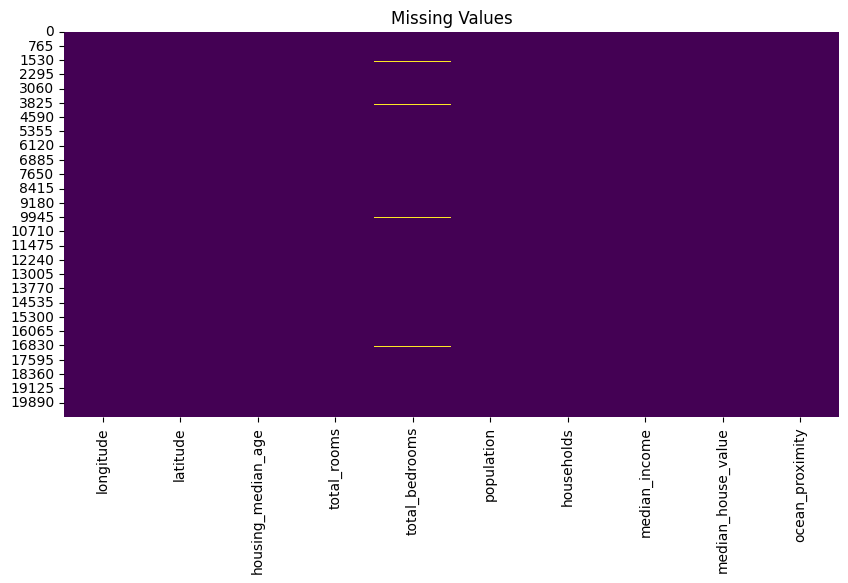

In [15]:
plt.figure(figsize=(10,5))
plt.title('Missing Values')
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

there is no missing value on Target but we do have 207 missing values for total bedrooms feature

## Checking target feature

In [17]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

we will check our target to see if its standard/normal or not

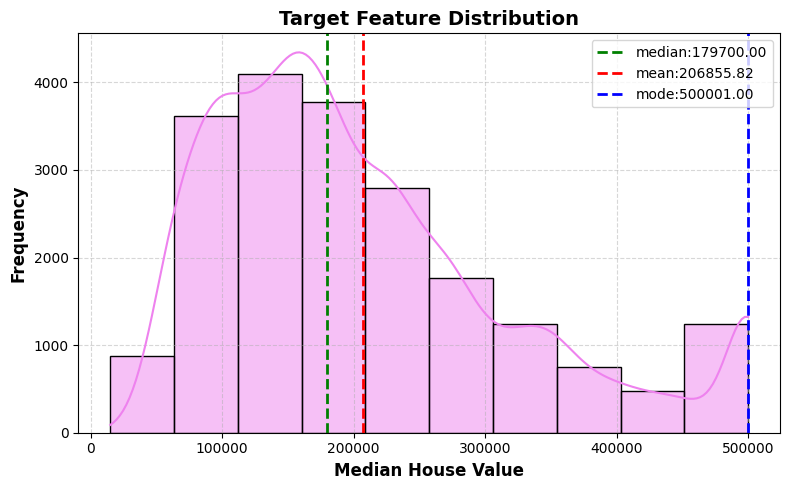

In [18]:

plt.figure(figsize=(8,5))
mean_val = df['median_house_value'].mean()
median_val = df['median_house_value'].median()
mode_val = df['median_house_value'].mode()[0]
bins = 10
sns.histplot(df['median_house_value'], bins=bins , kde=True, color='violet', edgecolor= 'black') #Kernel Density Estimate showing distribuation shape
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label = f'median:{median_val:.2f}')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label = f'mean:{mean_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label = f'mode:{mode_val:.2f}')

plt.title('Target Feature Distribution', fontsize = 14, fontweight='bold')
plt.xlabel('Median House Value', fontsize = 12, fontweight='bold')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold')
plt.legend()
plt.grid(True, linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()


eventhough the first half at right looks normal but suddenly we have a big tale at right at last bin which is also our mode (most repeated value)

by looking at this data it seems for very expensive districts and regions in california we have a limit and thats the reason all of them are limited to the mode number 500,001 dollar

## checking duplicates

checking if we have duplicate rows to be sure we dont have redundant data which will create bias

In [19]:
duplicates = df[df.duplicated(keep=False)]
display(duplicates)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


we dont have any duplicate rows, meaning that at least one value for feature is unique

## Checking outliers with IQR Rule

In [21]:
def iqr_outlier_summary(df):
    results = []

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower_outliers = df[df[col] < lower_bound].shape[0]
        upper_outliers = df[df[col] > upper_bound].shape[0]
        total_outliers = lower_outliers + upper_outliers
        perc_outliers = (total_outliers / len(df)) * 100

        results.append({
            'Feature': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Lower Outliers': lower_outliers,
            'Upper Outliers': upper_outliers,
            'Total Outliers': total_outliers,
            'Percentage (%)': round(perc_outliers, 2)
        })

    return pd.DataFrame(results)

# Run summary
outlier_table = iqr_outlier_summary(df)
print(outlier_table)


              Feature   Lower Bound    Upper Bound  Lower Outliers  \
0           longitude   -127.485000    -112.325000               0   
1            latitude     28.260000      43.380000               0   
2  housing_median_age    -10.500000      65.500000               0   
3         total_rooms  -1102.625000    5698.375000               0   
4      total_bedrooms   -230.500000    1173.500000               0   
5          population   -620.000000    3132.000000               0   
6          households   -207.500000    1092.500000               0   
7       median_income     -0.706375       8.013025               0   
8  median_house_value -98087.500000  482412.500000               0   

   Upper Outliers  Total Outliers  Percentage (%)  
0               0               0            0.00  
1               0               0            0.00  
2               0               0            0.00  
3            1287            1287            6.24  
4            1271            1271      

it seems at most we have 6.24 percent of outliers in our data set which belongs to total bedrooms feature, which we will handle later in our feature engineering

## Checking Min and Max

we will check CAP (Winsorized)

In [22]:
def min_max_summary(df):
    results = []

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        col_min = df[col].min()
        col_max = df[col].max()

        min_count = (df[col] == col_min).sum()
        max_count = (df[col] == col_max).sum()

        min_perc = round((min_count / len(df)) * 100, 2)
        max_perc = round((max_count / len(df)) * 100, 2)

        results.append({
            'Feature': col,
            'Min Value': col_min,
            'Min Count': min_count,
            'Min %': min_perc,
            'Max Value': col_max,
            'Max Count': max_count,
            'Max %': max_perc
        })

    return pd.DataFrame(results)

min_max_table = min_max_summary(df)
print(min_max_table)


              Feature   Min Value  Min Count  Min %    Max Value  Max Count  \
0           longitude   -124.3500          1   0.00    -114.3100          1   
1            latitude     32.5400          1   0.00      41.9500          2   
2  housing_median_age      1.0000          4   0.02      52.0000       1273   
3         total_rooms      2.0000          1   0.00   39320.0000          1   
4      total_bedrooms      1.0000          1   0.00    6445.0000          1   
5          population      3.0000          1   0.00   35682.0000          1   
6          households      1.0000          1   0.00    6082.0000          1   
7       median_income      0.4999         12   0.06      15.0001         49   
8  median_house_value  14999.0000          4   0.02  500001.0000        965   

   Max %  
0   0.00  
1   0.01  
2   6.17  
3   0.00  
4   0.00  
5   0.00  
6   0.00  
7   0.24  
8   4.68  


we have median_house_age and median_house_value and probably also some median_income caped, for sure we will add a flag to them to be treated separatly since they might disturb the prediction

## Check impossible values

In [23]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Univariate analysis

### Numeric features histogram

Numeric columns being shows as histogram

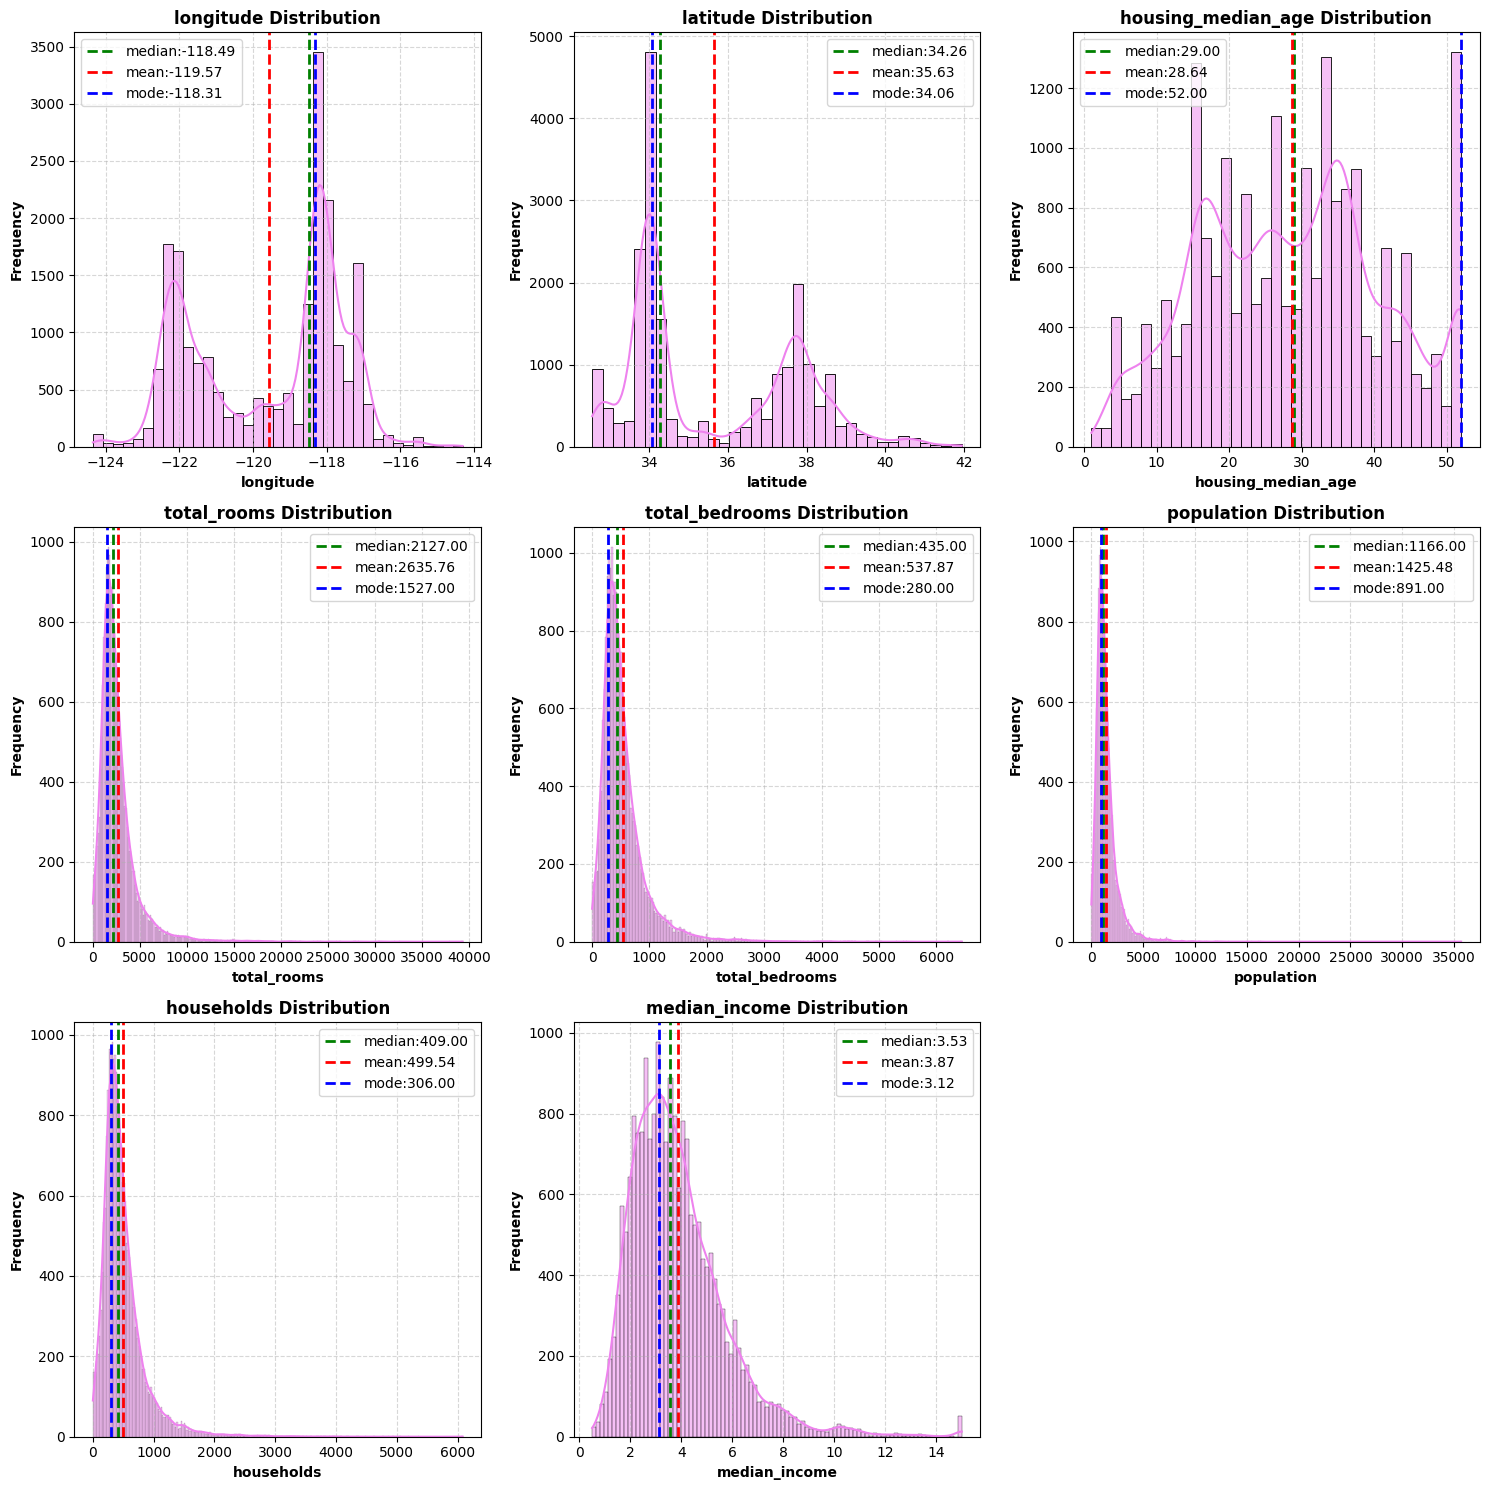

In [24]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('median_house_value')

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, color='violet', edgecolor='black')
    plt.title(f'{col} Distribution', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10, fontweight='bold')
    plt.ylabel('Frequency', fontsize=10, fontweight='bold')

    # Calculate mean, median, and mode for the current column
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]

    # Add mean, median, and mode lines to the plot
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label = f'median:{median_val:.2f}')
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label = f'mean:{mean_val:.2f}')
    plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label = f'mode:{mode_val:.2f}')
    plt.legend()

    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Numeric features violin plot

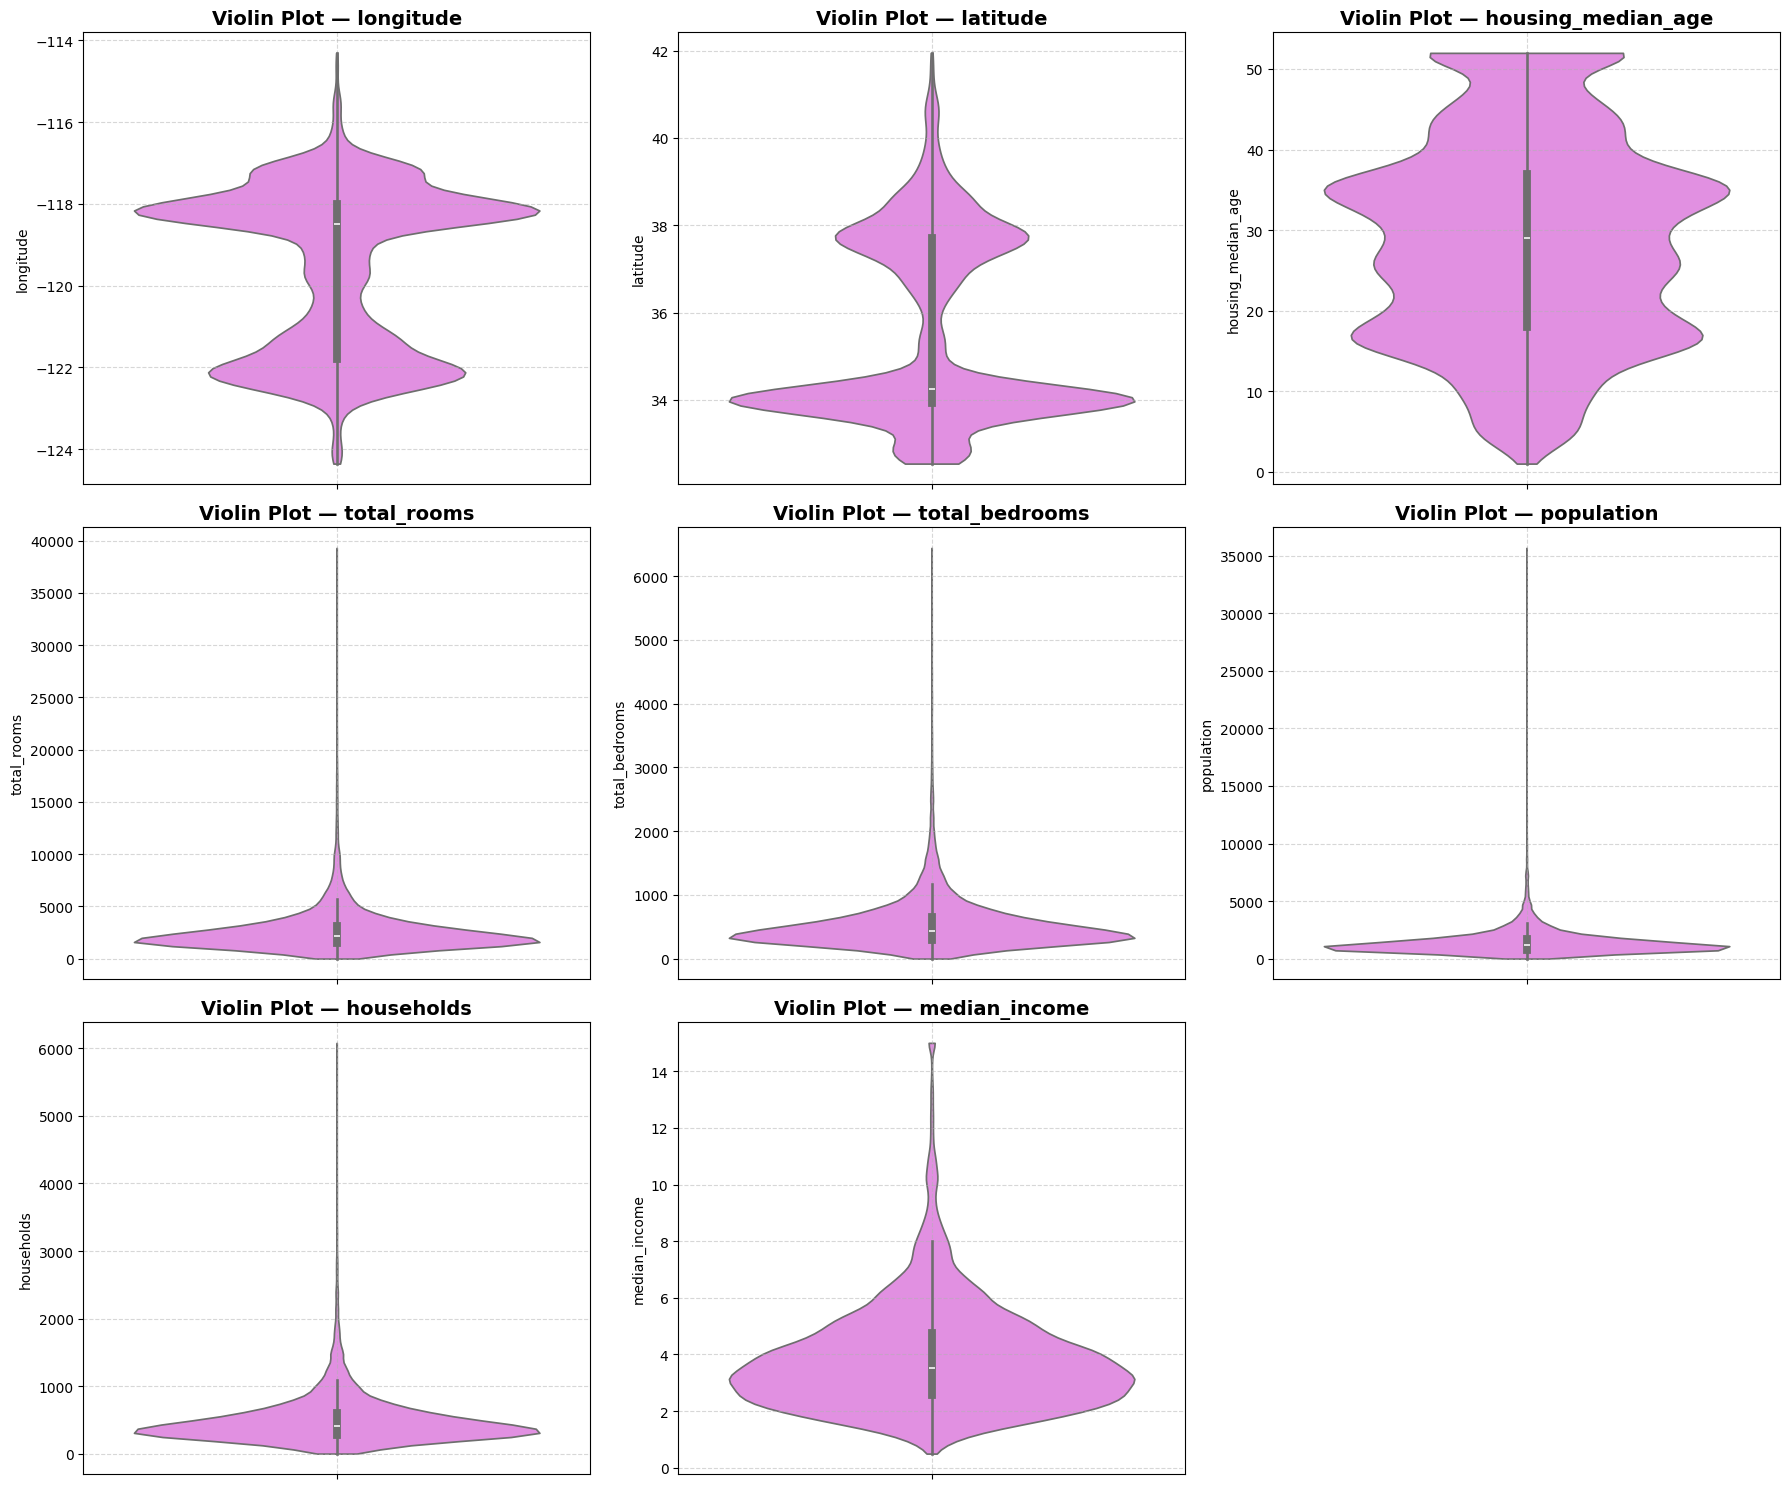

In [25]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('median_house_value')

n_rows = math.ceil(len(numerical_cols) / 3)  # up to 3 per row for readability
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
        sns.violinplot(y=df[col], ax=axes[i], inner="box", cut=0, color="violet")
        axes[i].set_title(f"Violin Plot — {col}", fontsize=14, fontweight="bold")
        axes[i].set_xlabel("")
        axes[i].set_ylabel(col)
        axes[i].grid(True, linestyle="--", alpha=0.5)
#there will be one unused subplot we will hide it
for j in range(i + 1,len(axes)):
        axes[j].axis('off')
plt.tight_layout()
plt.show()

### Numeric features box plot

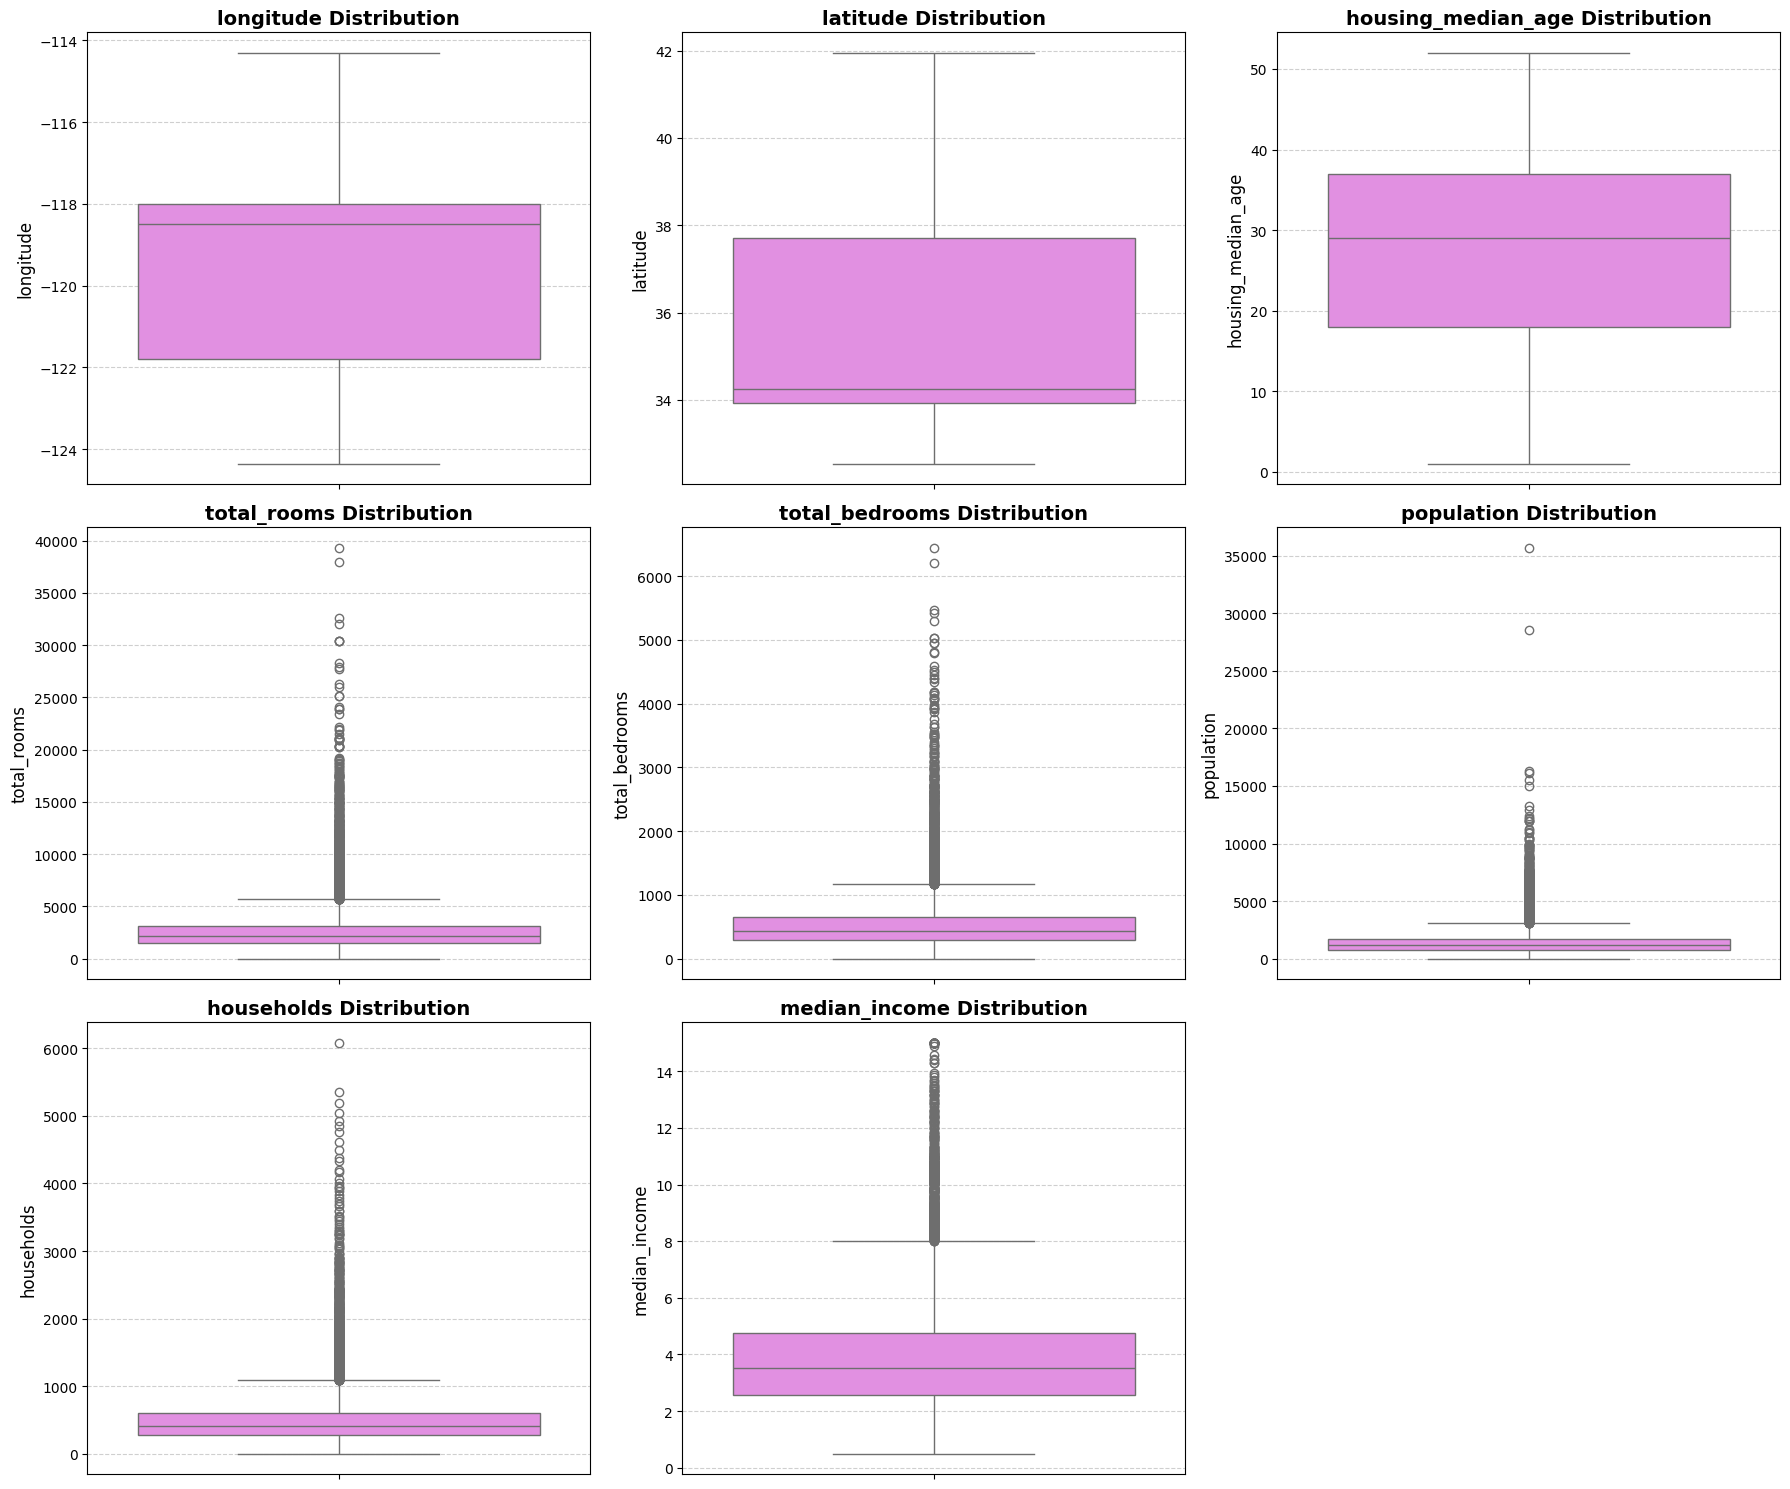

In [26]:
target_col = "median_house_value"
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove(target_col)
n_rows = math.ceil(len(numerical_cols) / 3)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color="violet"
    )
    axes[i].set_title(f"{col} Distribution", fontsize=14, fontweight="bold")
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].grid(True, axis="y", linestyle="--", alpha=0.6)

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Categorical Feature Count plot

Categorical columns being shown as count plot

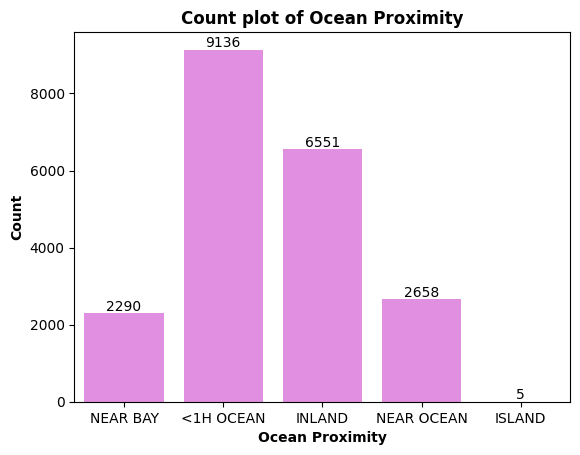

In [27]:
ax = sns.countplot(x=df['ocean_proximity'], data=df, color='violet')
plt.title('Count plot of Ocean Proximity', fontsize=12, fontweight='bold')
plt.xlabel('Ocean Proximity', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Bivariate

### Categorical vs numeric features

#### Swarm Plot

Swarm plot shows error because we have too many data and rows and basically its becomming overplotted so we comment it out and we use an alternative way

```
plt.figure(figsize=(9, 5))
sns.swarmplot(data=df, x="ocean_proximity", y="households")
plt.title("Swarm plot: Ocean Proximity by Households")
plt.show()
```

#### Strip plot

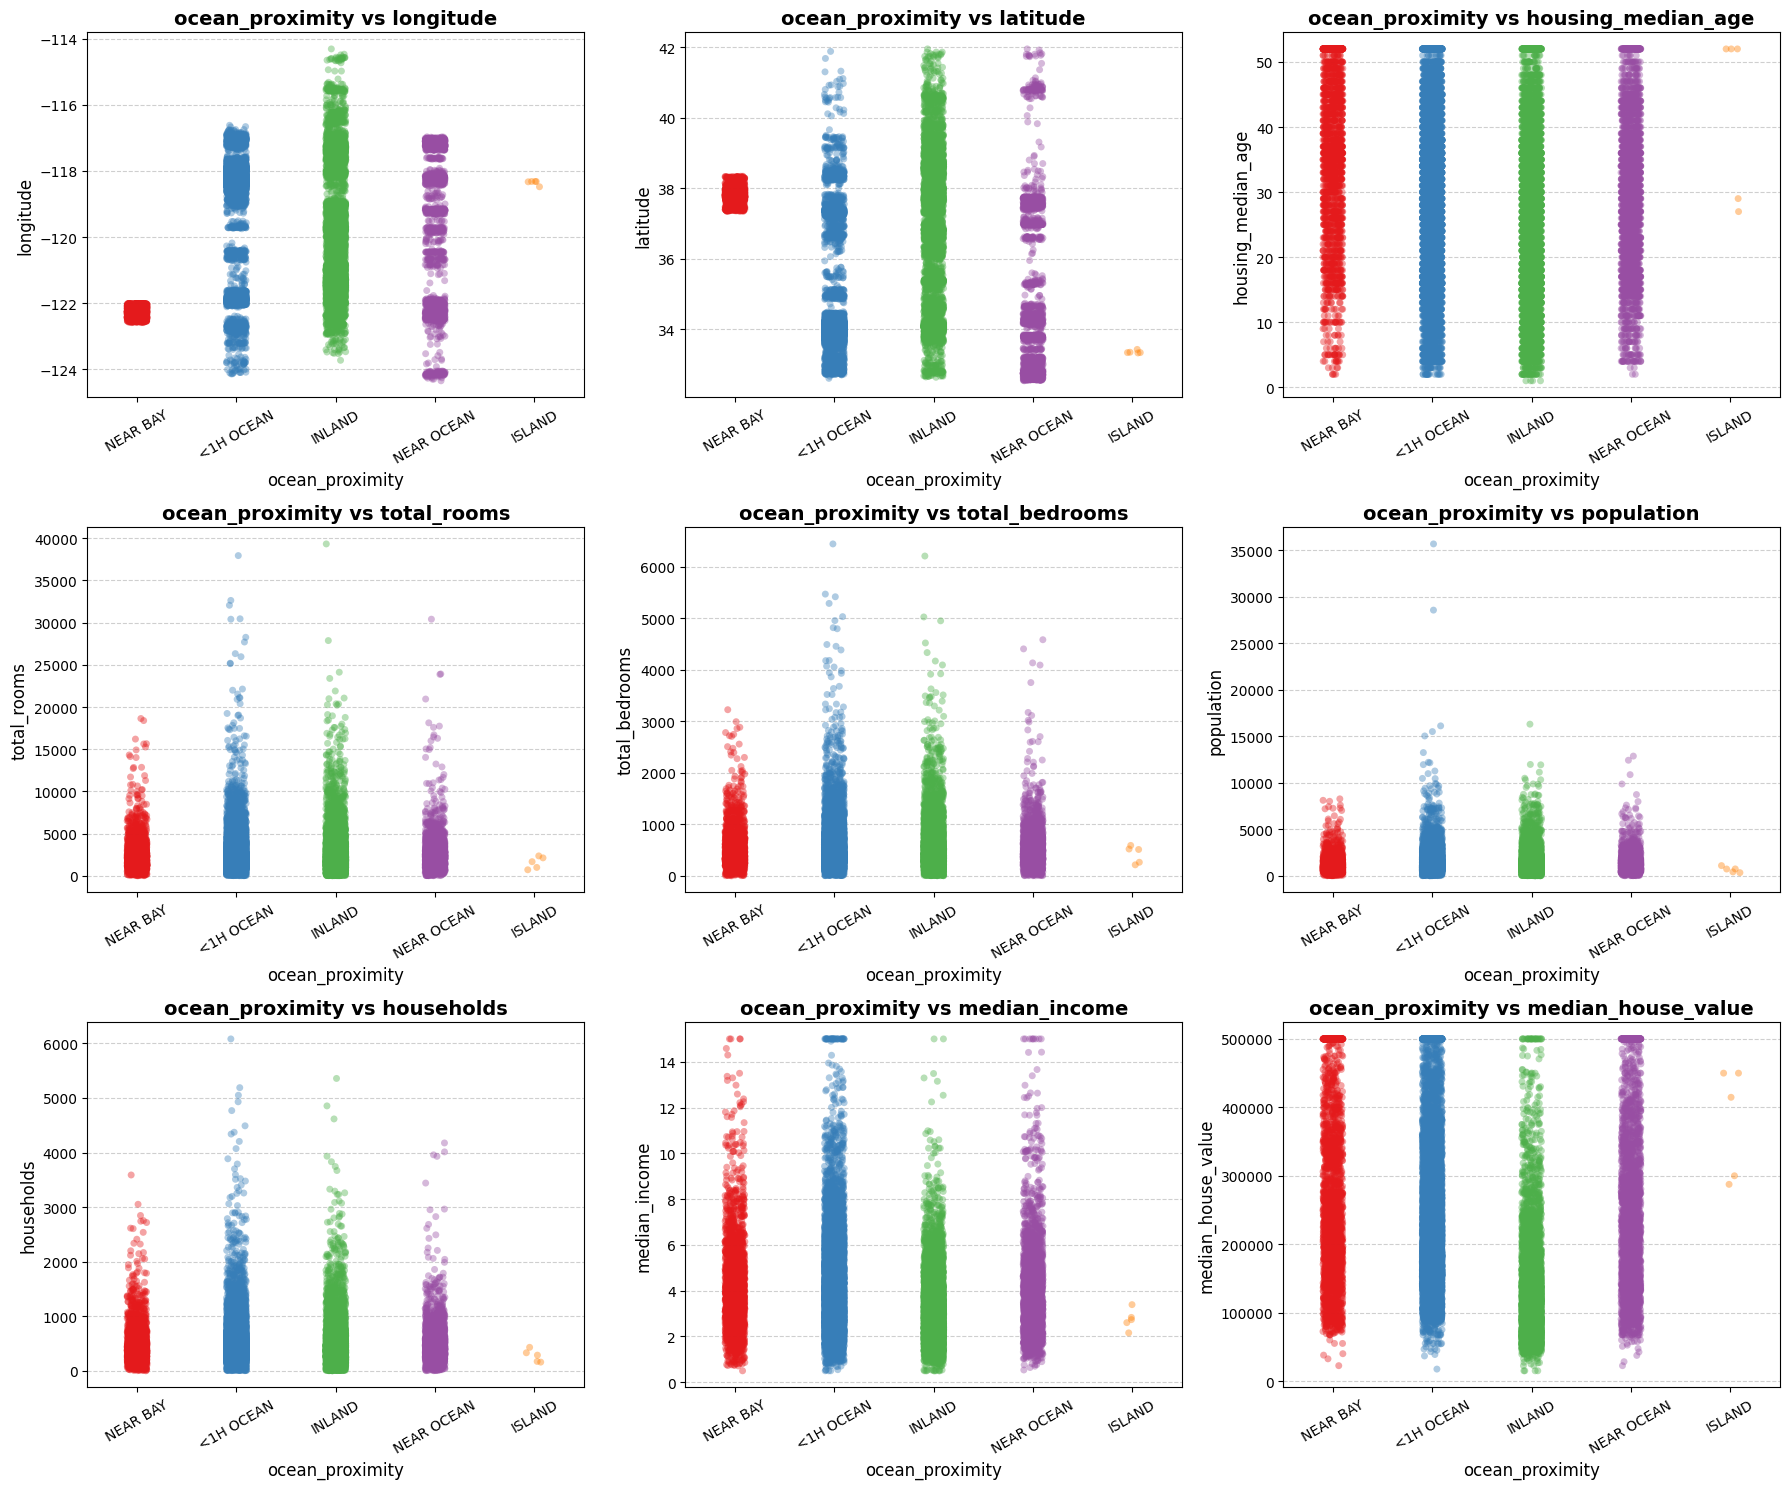

In [28]:
cat_col = "ocean_proximity"
numerical_cols = df.select_dtypes(include="number").columns.tolist()
n_rows = math.ceil(len(numerical_cols) / 3)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.stripplot(
    x=df[cat_col],
    y=df[col],
    hue=df[cat_col],
    dodge=False,
    legend=False,
    ax=axes[i],
    jitter=True,
    alpha=0.4,
    palette="Set1"
    )

    axes[i].set_title(f"{cat_col} vs {col}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(cat_col, fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis="x", rotation=30)  # rotate x labels for readability
    axes[i].grid(True, axis="y", linestyle="--", alpha=0.6)

for j in range(len(numerical_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show();

### Numeric vs Numeric

#### Scatter Plot

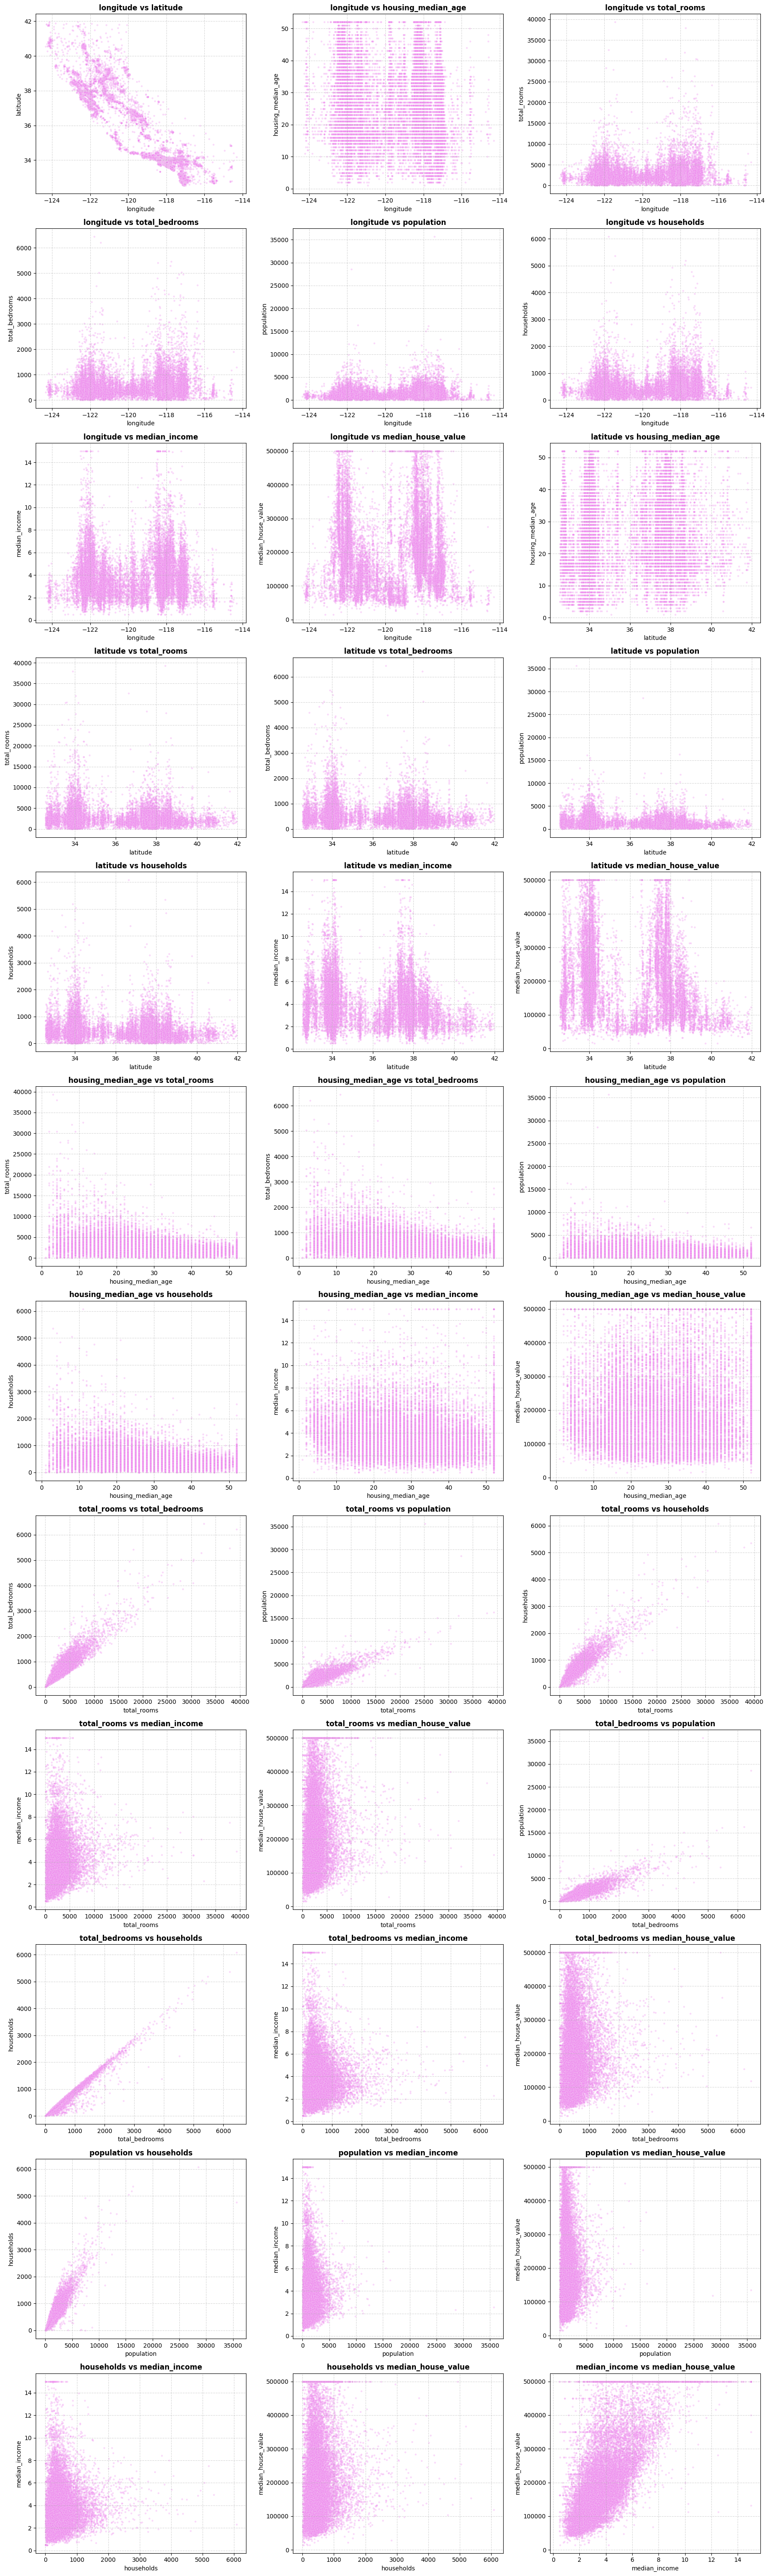

In [29]:
num_cols = df.select_dtypes(include="number").columns.tolist()
pairs = list(itertools.combinations(num_cols, 2))
n_rows = math.ceil(len(pairs) / 3)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, (col_x, col_y) in enumerate(pairs):
    sns.scatterplot(
        x=df[col_x],
        y=df[col_y],
        ax=axes[i],
        alpha=0.3,
        s=10,
        color="violet"
    )
    axes[i].set_title(f"{col_x} vs {col_y}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col_x, fontsize=10)
    axes[i].set_ylabel(col_y, fontsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.5)

for j in range(len(pairs), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Longitude & Latitude

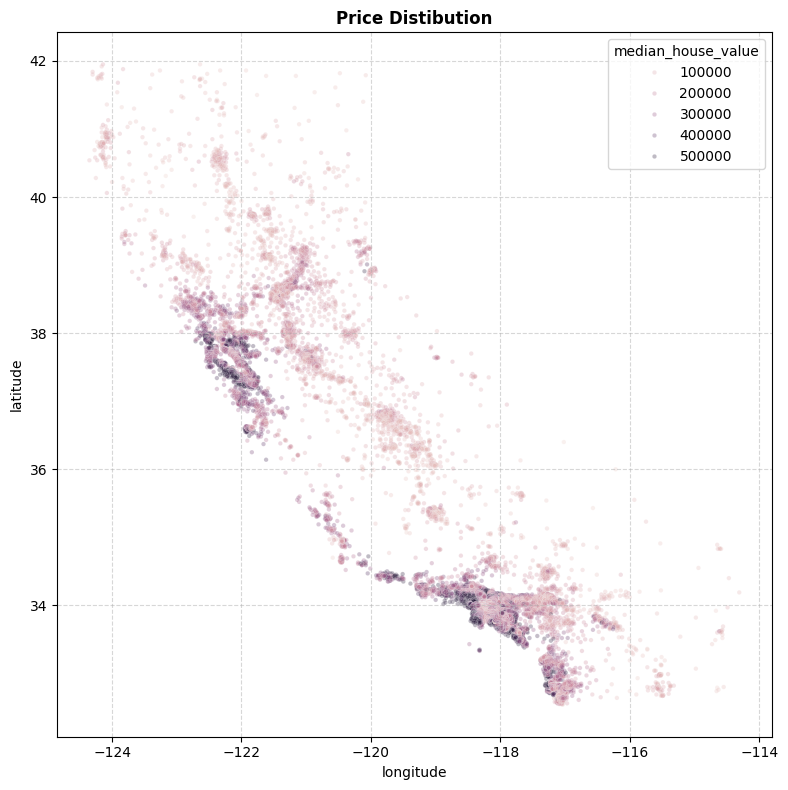

In [30]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.scatterplot(
      x=df['longitude'],
      y=df['latitude'],
      alpha=0.3,
      s=10,
      hue=df['median_house_value'],
      color="violet"
  )
plt.title("Price Distibution", fontsize=12, fontweight="bold")
plt.xlabel('longitude', fontsize=10)
plt.ylabel('latitude', fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

Now after seeing the data distribution on the map I like to see colors, hue based on median_house_value for this longitude and latitide scatter plot

Image was successfully imported from: /content/drive/MyDrive/ML Projects/California Housing Prices/data/price ditribution.png



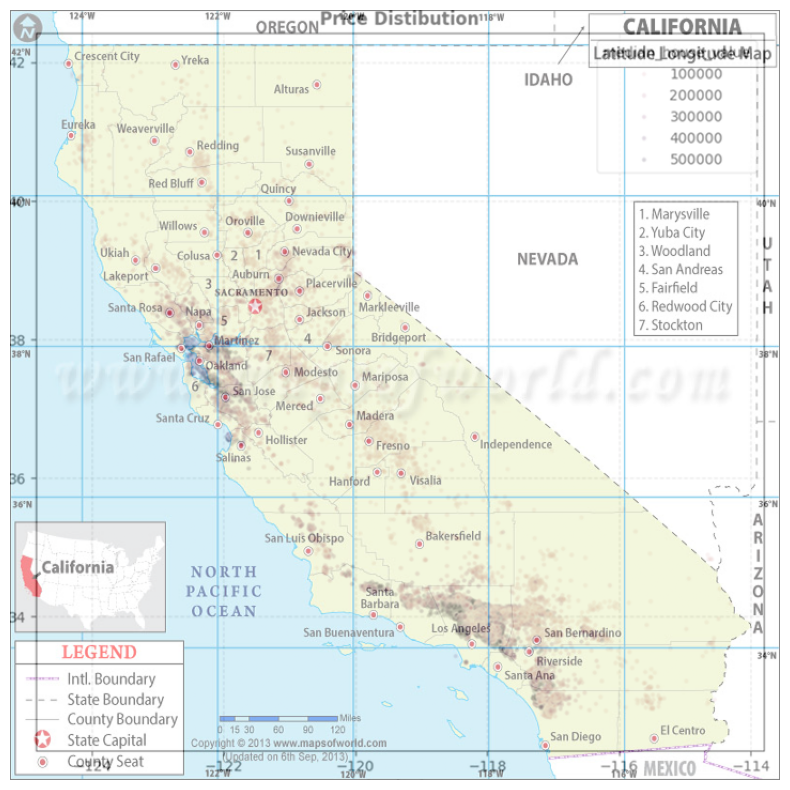

In [33]:
show_png("/content/drive/MyDrive/ML Projects/California Housing Prices/data/price ditribution.png")

as we assumed close to Los Angeles and San Fransisco have more expensive houses

### Scatter plot for capped features

as we saw earlier that a lot of median features are capped now we should see how max value for them is distributed

housing_median_age-
52.0000-
1273   

median_income-
15.0001-
49   

median_house_value-
500001.0000-
965

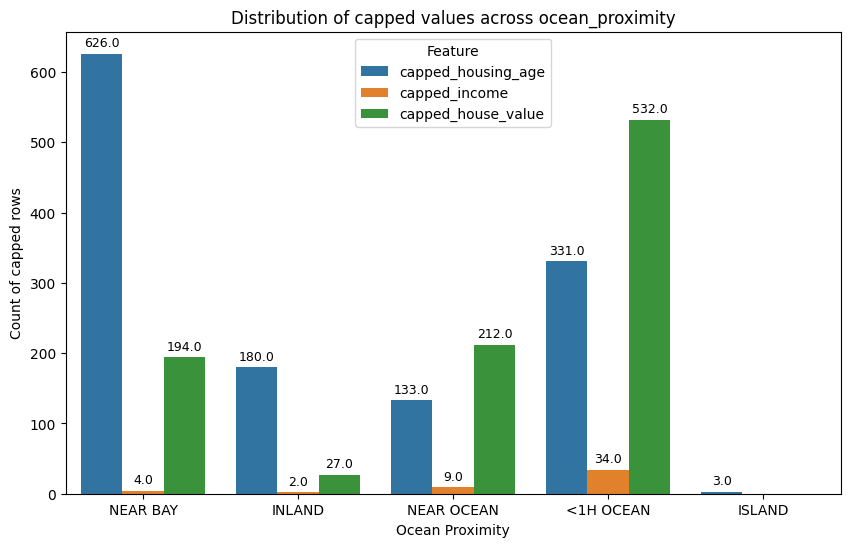

In [35]:
caps = {
    'housing_median_age': 52.0,
    'median_income': 15.0001,
    'median_house_value': 500001.0
}
df['capped_housing_age'] = (df['housing_median_age'] == caps['housing_median_age']).astype(int)
df['capped_income'] = (df['median_income'] == caps['median_income']).astype(int)
df['capped_house_value'] = (df['median_house_value'] == caps['median_house_value']).astype(int)
melted = df.melt(
    id_vars='ocean_proximity',
    value_vars=['capped_housing_age', 'capped_income', 'capped_house_value'],
    var_name='Feature',
    value_name='IsCapped'
)
melted = melted[melted['IsCapped'] == 1]
plt.figure(figsize=(10,6))
ax = sns.countplot(data=melted, x='ocean_proximity', hue='Feature')
plt.title("Distribution of capped values across ocean_proximity")
plt.ylabel("Count of capped rows")
plt.xlabel("Ocean Proximity")
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.legend(title="Feature")
plt.show()


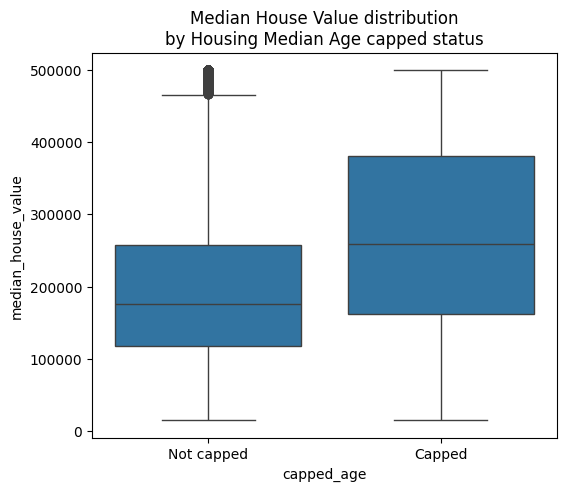

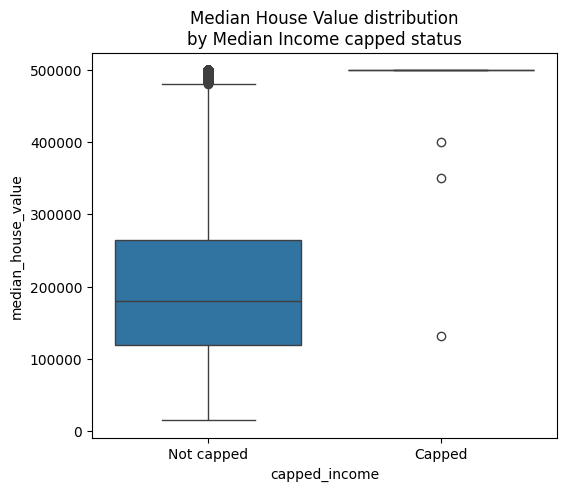

In [36]:
df['capped_age'] = (df['housing_median_age'] == 52).astype(int)
df['capped_income'] = (df['median_income'] == 15.0001).astype(int)
plt.figure(figsize=(6,5))
sns.boxplot(x='capped_age', y='median_house_value', data=df)
plt.xticks([0,1], ['Not capped', 'Capped'])
plt.title("Median House Value distribution\nby Housing Median Age capped status")
plt.show()
plt.figure(figsize=(6,5))
sns.boxplot(x='capped_income', y='median_house_value', data=df)
plt.xticks([0,1], ['Not capped', 'Capped'])
plt.title("Median House Value distribution\nby Median Income capped status")
plt.show()


what we learn from first box plot is older houses and older blocks tend to push the price higher than newer houses and newer blocks

also we see that high incomes which are capped tend to predict and show the highest possible value for the house and house price it self is also capped

Fun fact, when we put the map of California on longitude and latitude scatter plot we can see the data distubion and areas with most data and rows

## Correlation matrix

### Correlation matrix between all numeric features

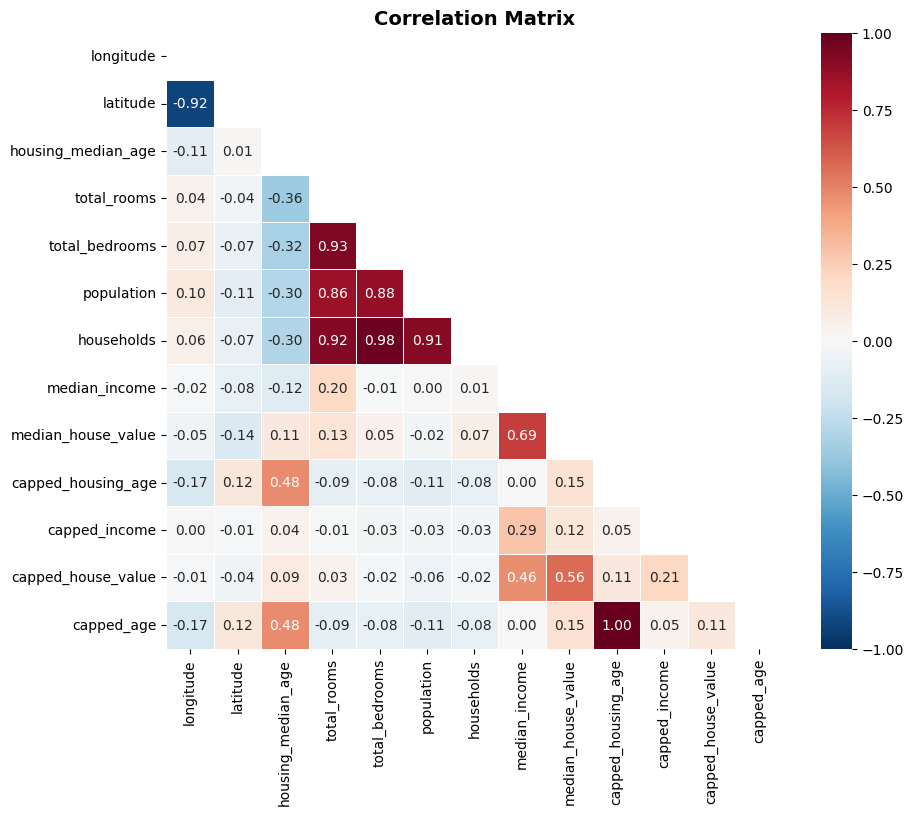

In [37]:
corr = df.drop('ocean_proximity', axis=1).corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(
            corr,
            mask = mask,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            vmin=-1,
            vmax=1,
            center=0,
            cbar=True,
            square=True,
            linewidths=0.5

)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.show()

what we can see here is that

`total_bedrooms`
`population`
`households`
`total_rooms`


have high correlation so what we can do is instead doing some feature engineering later to merge them and create ratios instead of using raw features
or maybe we do PCA technique


what also is noteable is that median_income has high correlation with target feature and is one of the derivers of prediction

## Hypothesis

Since Im still learning I want to give it a try and use different base line models later on, meaning:

1. **Gradient Boosting like LightGBM**
   - No need for log transform because tree models dont care about skewed data and multicollinearity or scales
   - but we should one hot encode categorical features and also flag capped Features
   - what we can also do is clustering longitude and latitide to have areas
   - I will create ratios and drop them after baseline modeling if not needed
2. **Random Forest regressor **
   - No need for log transform because radom forest models dont care about skewed data and multicollinearity or scales
   - but we should one hot encode categorical features and also flag capped Features
   - what we can also do is clustering longitude and latitide to have areas
   - I will create ratios and drop them after baseline modeling if not needed
3. **Neural Network **
   - I will scale features
   - I will log transform(normalized/ standardize) features and I will drop redundant raws for totals after creating ratios
   - one hot encode categorical and flag capped features
   - making clusters based on longitude and latitude
4. **Linear Ridge Regression **
   - I will create ratio features from rooms and population and bedrooms and household
   - I will drop redundant raw totals
   - I will scale StandardScale Fetures
   - and I will Log transform features with skewed distributions
5. **Shallow Decision Tree **
   - No need for log transform because tree models dont care about skewed data and multicollinearity or scales
   - but we should one hot encode categorical features and also flag capped Features
   - what we can also do is clustering longitude and latitide to have areas
   - I will create ratios and drop them after baseline modeling if not needed



## Checklist Step 3

 - ✅ Reviewed distributions for all numeric features

 - ✅ Checked frequency tables for categorical features

 - ✅ Compared features against the target variable

 - ✅ Explored multivariate patterns and interactions

 - ✅ Logged correlations and possible redundancies

 - ✅ Investigated outliers and anomalies

 - ✅ Wrote down initial hypotheses

# Step 4: Feture engineering

I will create different data frames for each model that I will try to fit and compare later on but first I will do whatever is needed and shared for all data sets

## Missing values

what we should do first is handling missing values for our feature called `total-bedrooms`

## Creating Ratios

we will create ratios based on `households`, `total_rooms`, `total_bedrooms` and `population`

## Flag Capped features

since we have capped features in non target features `housing_median_age` `median_income`

## Onehot encoding categorical feature

we will onehot encode our only categorical feature called `ocean_proximity`

## Log Transform and standard scaling

for our models which need data being standard and without skew we will normalize, standardize and also log transform our features